## Test Your Skills

Practice your skills manipulating raster data using rioxarray.

In [3]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr

# plotting extent is used to plot raster  vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

# prettier plotting with seabron 
sns.set(font_scale=1.5,style="white")

In [4]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

## Challenge 1: Open And Plot Hillshade

In [8]:
# Open DTM data
lidar_dem_path = os.path.join("colorado-flood",
                             "spatial",
                             "boulder-leehill-rd",
                             "pre-flood",
                             "lidar",
                             "pre_DTM.tif")
lidar_dem_img = rxr.open_rasterio(lidar_dem_path,masked=True)

# Open DTM Hillshade
lidar_hs_path = os.path.join("colorado-flood",
                             "spatial",
                             "boulder-leehill-rd",
                             "pre-flood",
                             "lidar",
                             "pre_DTM_hill.tif")
lidar_dem_hill = rxr.open_rasterio (lidar_hs_path,masked=True)

<AxesSubplot: title={'center': 'Lidar DTM \n Overlayed on Top of hillshade'}>

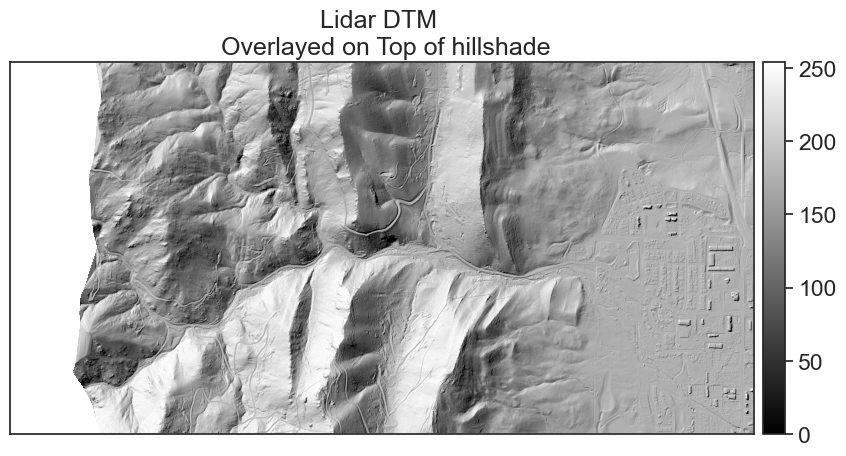

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

ep.plot_bands(lidar_dem_hill,
             ax=ax,
             cmap='gray',
             title="Lidar DTM \n Overlayed on Top of hillshade")

## Challenge 2: Overlay DTM Over DTM Hillshade

To plot both layers together, you use the same `ax` object for the two layers, and then add a `alpha` value to the DTM hillshade image. This value makes the image more transparent.

Below an `alpha` of 0.5 (50%) is applied. Play around with the alpha value to see how it impacts your map.

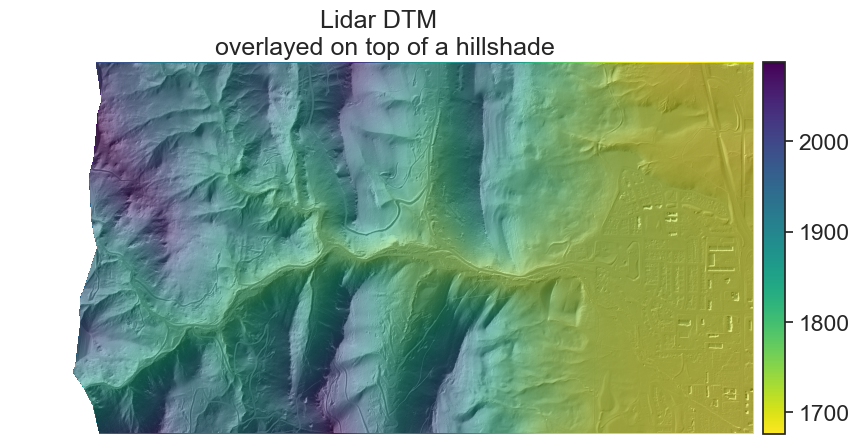

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

ep.plot_bands(lidar_dem_img,
             ax=ax,
             cmap='viridis_r',
             title="Lidar DTM \n overlayed on top of a hillshade")

ep.plot_bands(lidar_dem_hill,
             ax=ax,
             cmap='Greys',
             alpha=0.5,
             cbar=False)

ax.set_axis_off()

plt.show()

## Add A Site Boundary to Your Raster Plot

In [12]:
# Open site boundary vector layer
site_bound_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

ValueError: A 3-dimensional array was passed to imshow(), but there is no dimension that could be color.  At least one dimension must be of size 3 (RGB) or 4 (RGBA), and not given as x or y.

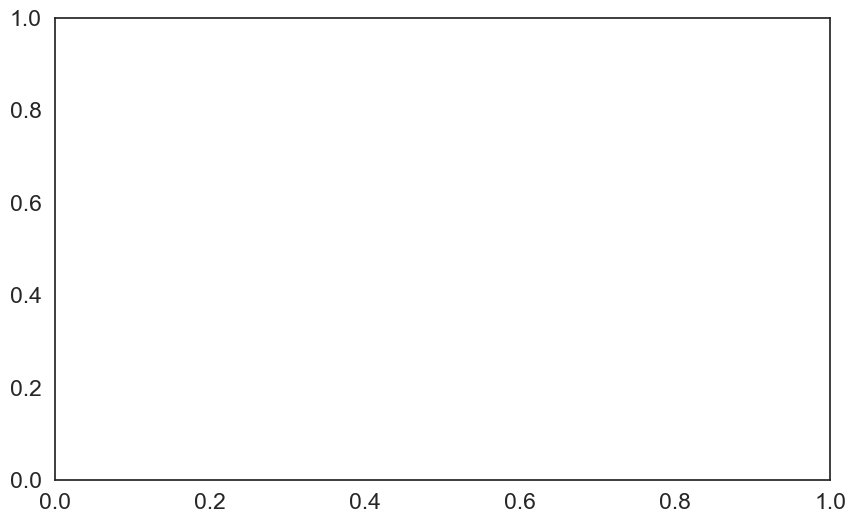

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

lidar_dem_img.plot.imshow(cmap='viridis',
                       ax=ax)
site_bound_shp.plot(color='none',
                   edgecolor='black',
                   linewidth=2,
                   ax=ax,
                   zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()